In [2]:
from PIL import Image
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

#file paths
#training data path
cat = '/content/drive/My Drive/CatNonCat/Dataset/cat/' #write complete path if file is not in same directory as that of this code
non_cat = '/content/drive/My Drive/CatNonCat/Dataset/notcat/'
resized_cat = '/content/drive/My Drive/CatNonCat/Dataset/resized/cat/'
resized_non_cat = '/content/drive/My Drive/CatNonCat/Dataset/resized/non_cat/'

#test data path
cat_test = '/content/drive/My Drive/CatNonCat/Dataset/cat_test/' 
non_cat_test = '/content/drive/My Drive/CatNonCat/Dataset/notcat_test/'
resized_cat_test = '/content/drive/My Drive/CatNonCat/Dataset/resized/cat_test/'
resized_non_cat_test = '/content/drive/My Drive/CatNonCat/Dataset/resized/nonCat_test/'



In [5]:


#make list of elements of file

#traning data
list_cat = os.listdir(cat)
list_non_cat = os.listdir(non_cat)

#test data
list_cat_test = os.listdir(cat_test)
list_non_cat_test = os.listdir(non_cat_test)



In [6]:
for i in list_cat:
    im = Image.open(cat+i)
    im1 = im.resize((200,200))
    im2 = im1.convert('RGB')
    im2.save(resized_cat+i,'JPEG')    

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [7]:
for i in list_cat_test:
    im = Image.open(cat_test+i)
    im1 = im.resize((200,200))
    im2 = im1.convert('RGB')
    im2.save(resized_cat_test+i,'JPEG') 

In [8]:
for i in list_non_cat:
    im = Image.open(non_cat+i)
    im1 = im.resize((200,200))
    im2 = im1.convert('RGB')
    im2.save(resized_non_cat+i,'JPEG') 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [9]:
for i in list_non_cat_test:
    im = Image.open(non_cat_test+i)
    im1 = im.resize((200,200))
    im2 = im1.convert('RGB')
    im2.save(resized_non_cat_test+i,'JPEG') 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [10]:
#traning data
list_cat = os.listdir(resized_cat)
list_non_cat = os.listdir(resized_non_cat)

#test data
list_cat_test = os.listdir(resized_cat_test)
list_non_cat_test = os.listdir(resized_non_cat_test)

In [11]:
m_cat = len(list_cat)
m_non_cat = len(list_non_cat)
m_cat_test = len(list_cat_test)
m_non_cat_test = len(list_non_cat_test)

In [12]:
print(m_cat)
print(m_non_cat)
print(m_cat_test)
print(m_non_cat_test)

544
400
186
200


In [13]:
train_cat = np.array([np.array(Image.open(resized_cat+i)).flatten() for i in list_cat], 'f')
test_cat = np.array([np.array(Image.open(resized_cat_test+i)).flatten() for i in list_cat_test], 'f')

In [14]:
print(train_cat.shape)
print(test_cat.shape)

train_cat = train_cat.T
test_cat = test_cat.T

print(train_cat.shape)
print(test_cat.shape)

(544, 120000)
(186, 120000)
(120000, 544)
(120000, 186)


In [15]:
train_non_cat = np.array([np.array(Image.open(resized_non_cat+i)).flatten() for i in list_non_cat], 'f')
test_non_cat = np.array([np.array(Image.open(resized_non_cat_test+i)).flatten() for i in list_non_cat_test], 'f')

In [16]:
print(train_non_cat.shape)
print(test_non_cat.shape)

train_non_cat = train_non_cat.T
test_non_cat = test_non_cat.T

print(train_non_cat.shape)
print(test_non_cat.shape)

(400, 120000)
(200, 120000)
(120000, 400)
(120000, 200)


In [17]:
final_train = np.concatenate((train_cat, train_non_cat), axis = 1)
final_test = np.concatenate((test_cat, test_non_cat), axis = 1)

In [18]:
print(final_train.shape)
print(final_test.shape)

(120000, 944)
(120000, 386)


In [19]:
#Labelling the dataset

m = final_train.shape[1]
m_test = final_test.shape[1]
Y = np.zeros((m, 1), dtype=int)
Y_test = np.zeros((m_test, 1),dtype=int)
Y[0:m_cat] = 1
Y_test[0:m_cat_test] = 1

In [20]:
Y.shape

(944, 1)

In [21]:
Y_test.shape

(386, 1)

In [22]:
final_train = final_train.T
final_test = final_test.T

print(final_train.shape)
print(final_test.shape)

(944, 120000)
(386, 120000)


In [23]:
#shuffle data
X_train,Y_train = shuffle(final_train,Y, random_state=0)
X_test,Y_test = shuffle(final_test,Y_test, random_state=0)

In [24]:
X_train = X_train.T
X_test = X_test.T

In [25]:
print(X_train.shape)
print(X_test.shape)

(120000, 944)
(120000, 386)


In [26]:
Y_train = Y_train.T
Y_test = Y_test.T

In [27]:
print(Y_train.shape)
print(Y_test.shape)

(1, 944)
(1, 386)


In [28]:
#standardize data
X_train = X_train/255   #255 is maximum possible value in image pixle 
X_test = X_test/255

In [29]:
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    return s

In [30]:
def initialize(dim):
    w = np.zeros((dim, 1), dtype=int)
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w,b

In [37]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    cost = (-1 / m) * np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A))) 
    
    dw = (1/m)* np.dot(X, (A-Y).T)
    db = (1/m)* np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grad = {"dw":dw,
            "db":db}
    
    return grad,cost

In [38]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        
        grad,cost = propagate(w,b, X, Y)
    
        dw = grad["dw"]
        db = grad["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i%100==0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" % (i, cost))
        
    params = {"w": w,
              "b": b}
    grad = {"dw": dw,
             "db": db}
    
    return params, grad, costs

In [39]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid((np.dot(w.T, X)))
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
       
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [47]:
def model(X_train, Y_train, X_test, Y_test, w, b, num_iterations=2000, learning_rate=0.5):
    
    # initialize parameters with zeros
    #w, b = initialize(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [45]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = 0.0002)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.611857
Cost after iteration 200: 0.586933
Cost after iteration 300: 0.568387
Cost after iteration 400: 0.553385
Cost after iteration 500: 0.540665
Cost after iteration 600: 0.529528
Cost after iteration 700: 0.519551
Cost after iteration 800: 0.510461
Cost after iteration 900: 0.502074
Cost after iteration 1000: 0.494260
Cost after iteration 1100: 0.486923
Cost after iteration 1200: 0.479992
Cost after iteration 1300: 0.473413
Cost after iteration 1400: 0.467143
Cost after iteration 1500: 0.461146
Cost after iteration 1600: 0.455395
Cost after iteration 1700: 0.449866
Cost after iteration 1800: 0.444539
Cost after iteration 1900: 0.439398
Cost after iteration 2000: 0.434428
Cost after iteration 2100: 0.429617
Cost after iteration 2200: 0.424954
Cost after iteration 2300: 0.420429
Cost after iteration 2400: 0.416033
Cost after iteration 2500: 0.411760
Cost after iteration 2600: 0.407601
Cost after iteration 2700: 0.403552
Cost

In [52]:
d2 = model(X_train, Y_train, X_test, Y_test, d["W"], d["b"], num_iterations=2000, learning_rate = 0.0002)

Cost after iteration 0: 0.331471
Cost after iteration 100: 0.329000
Cost after iteration 200: 0.326570
Cost after iteration 300: 0.324179
Cost after iteration 400: 0.321827
Cost after iteration 500: 0.319513
Cost after iteration 600: 0.317235
Cost after iteration 700: 0.314993
Cost after iteration 800: 0.312785
Cost after iteration 900: 0.310611
Cost after iteration 1000: 0.308470
Cost after iteration 1100: 0.306360
Cost after iteration 1200: 0.304282
Cost after iteration 1300: 0.302234
Cost after iteration 1400: 0.300216
Cost after iteration 1500: 0.298226
Cost after iteration 1600: 0.296265
Cost after iteration 1700: 0.294331
Cost after iteration 1800: 0.292423
Cost after iteration 1900: 0.290542
train accuracy: 92.58474576271186 %
test accuracy: 79.79274611398964 %


(120000, 1)
[[1.]]


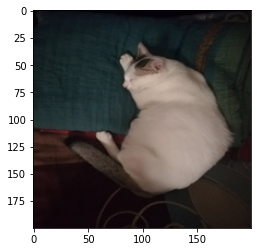

In [68]:

my_image = "/content/drive/My Drive/CatNonCat/my_cat.jpg"   # change this to the name of your image file 
#my_image = "/content/drive/My Drive/CatNonCat/Dataset/notcat/00000000.jpg"
image = Image.open(my_image)
im1 = image.resize((200,200))
im2 = im1.convert('RGB')
image = np.array([np.array(im2).flatten()], 'f')
image = image.T
print(image.shape)
image = image/255

my_predicted_image = predict(d2["W"], d2["b"], image)

plt.imshow(im1)
print(my_predicted_image)
#print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")